In [1]:
# %pip install pandas
# %pip install matplotlib
# %pip install numpy


Start date: 2022-06-10 19:09:31     
End date: 2022-06-08 21:05:19

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import random
import nltk
from datetime import datetime

In [39]:
# Will read in as a dict
with open('reddit_ni_new_data.json') as outfile:
    reddit_df = json.load(outfile)

type(reddit_df) # Checking type

dict

In [84]:
# Get the start and end `created` dates
created = reddit_df['created']
created_list = list(created.values())
created_start = int(created_list[0])
created_end = int(created_list[-1])

# Convert from unix time to datetime
start_datetime = datetime.fromtimestamp(created_start).strftime('%Y-%m-%d %H:%M:%S')
end_datetime = datetime.fromtimestamp(created_end).strftime('%Y-%m-%d %H:%M:%S')
start_datetime

'2022-06-10 19:09:31'

In [85]:
end_datetime

'2022-06-08 21:05:19'

In [4]:
# reddit_ni_data['post_author']

In [5]:
# Get the keys of the dict
keys = reddit_ni_data.keys() 
print(keys)

dict_keys(['created', 'downs', 'post_author', 'post_content', 'post_title', 'score', 'subreddit', 'ups', 'upvote_ratio', 'url'])


I want to get a list of the individual authors

In [6]:
unique_authors = set(reddit_ni_data['post_author'].values())
len(unique_authors)

85

In [7]:
# Convert set to df
unique_authors_df = pd.DataFrame(unique_authors)
type(unique_authors_df)

pandas.core.frame.DataFrame

Since every post will need a title, we can see how many posts we have but look at the number of titles

In [8]:
titles = set(reddit_ni_data['post_title'].values())
len(titles)

100

In [9]:
# titles

So we have 367 individual authors who have written 499 posts. 

I would like to know, first off, who has created the most posts in my dataset

In [10]:
author_list = list(unique_authors)

from collections import Counter, defaultdict
counts = Counter(author_list)
# counts.most_common

In [11]:
post_df = pd.DataFrame.from_dict(reddit_ni_data)
# post_df.head(10)

In [12]:
post_df_sorted_by_author = post_df.sort_values(by="post_author", ascending=True)
# post_df_sorted_by_author.head()



In [13]:
post_df_sorted_by_upvote = post_df.sort_values(by="ups", ascending=False)
# post_df_sorted_by_upvote.head()

In [14]:
capt = post_df.loc[post_df.post_author == "CaptianSpice"]
# capt.head(50)

In [15]:
author_title_df = post_df.loc[:,['post_author','post_title']]
author_title_df.size
# I'm not sure yet why this is the size it is
# author_title_df.head(50)

1000

In [16]:
# author_title_df['post_author']

In [17]:
len(author_title_df)

500

In [18]:
unique_authors_df.columns = ["post_author"]
res = pd.merge(author_title_df, unique_authors_df, on='post_author', how="inner")
# author_title_df.columns
# unique_authors_df.columns


In [19]:
# res.head()

In [37]:
# Get the frequency of posters over data period
author_post_freq = res['post_author'].value_counts()
author_post_freq

MaximusThrowaway238    20
unknown_wizard2183     15
Seamus_Hean3y          15
MarsFolta              15
CaptianSpice           15
                       ..
Different_Onion         5
beardlessdestroyer      5
SativaLearning          5
Obi_Benobi_Kenobi       5
SirJoePininfarina       5
Name: post_author, Length: 85, dtype: int64

The top three posters over the dates I have data for are `CaptianSpice`, `Paddy_Irishman_` and `Tornadoninja-6531`.      

First, we will look at `CaptianSpice`

In [21]:
# Gather the index values of the posts by CaptainSpice
CaptianSpice_post_index = post_df.index[post_df['post_author'] == 'CaptianSpice'].tolist()

type(CaptianSpice_post_index)
len(CaptianSpice_post_index)


15

In [22]:
CaptianSpice_title_holder = []
for x in range(len(CaptianSpice_post_index)):
    capt_res = post_df['post_title'].iloc[int(CaptianSpice_post_index[x])]
    CaptianSpice_title_holder.append(capt_res)

In [23]:
# CaptianSpice_title_holder

In [24]:
CaptianSpice_title_word_freq = Counter(CaptianSpice_title_holder)
# CaptianSpice_title_word_freq

From the above, I need to split each sentence into workds

In [25]:
CaptianSpice_word_bag = ' '.join(CaptianSpice_title_holder).split()
# CaptianSpice_word_bag

In [26]:
CaptianSpice_title_word_freq = Counter(CaptianSpice_word_bag)
# CaptianSpice_title_word_freq.values()

Trying a different apprach to getting my sentences into words

In [27]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Seán\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# word_tokens = word_tokenize(CaptianSpice_title_holder)

Nope. Tokenizer didn't work. Now I will try and remove the `stopwords` using a different method

In [29]:
CaptianSpice_word_bag_filtered = []

for w in CaptianSpice_word_bag:
    if w not in stop_words:
        CaptianSpice_word_bag_filtered.append(w)
len(CaptianSpice_word_bag_filtered)

175

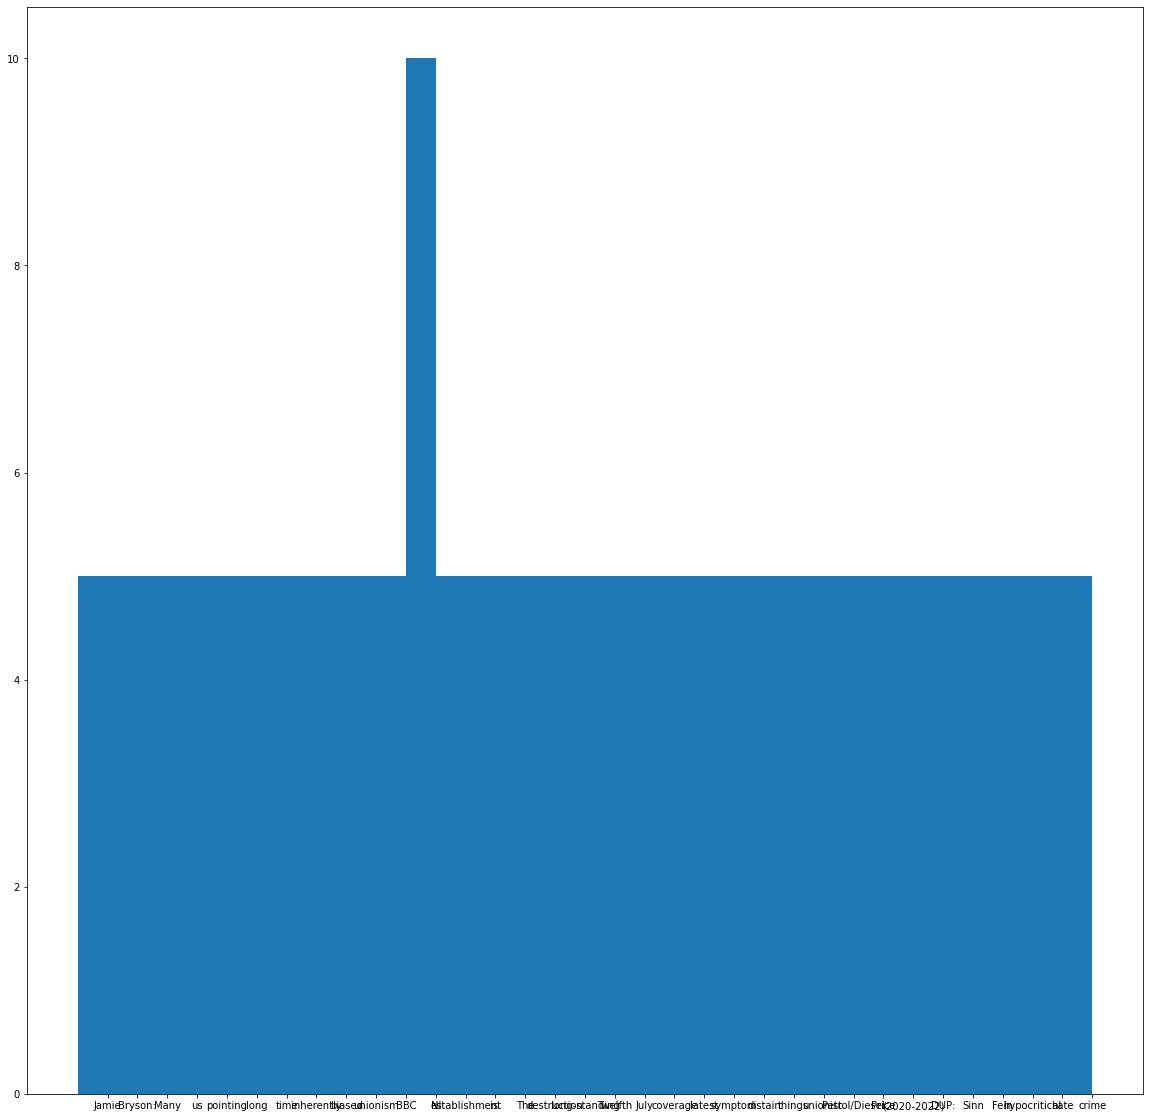

In [30]:
cs_counted_words = Counter(CaptianSpice_word_bag_filtered)

labels, values = zip(*cs_counted_words.items())
indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(20,20))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)

plt.show()

In [31]:
cs_counted_words.values()

dict_values([5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 10, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5])

In [32]:
meh = []
for x in range(len(cs_counted_words.values())):
    if cs_counted_words.values > 1:
        print(cs_counted_words.items(x))

TypeError: '>' not supported between instances of 'builtin_function_or_method' and 'int'

Now I will try and look at the post content for the authors

In [33]:
# CaptianSpice post content
author_content_df = post_df.loc[:,['post_author','post_content']]
author_content_df

,post_author,post_content
0,FILL_UR_BOOTS,I’ve convinced myself I’m going mad but have 3...
1,Lopsided-Meet8247,
2,Dingusrev,Seems strange watching something like this the...
3,RollestonHall,
4,Explodingstool,
...,...,...
495,kjjmcc,
496,dj-ada,"Good Evening Everybody,\n\nI’m writing a disse..."
497,Seamus_Hean3y,
498,beardlessdestroyer,


We can see that not every post contains content in the post body

In [34]:
author_content_df.head()

,post_author,post_content
0,FILL_UR_BOOTS,I’ve convinced myself I’m going mad but have 3...
1,Lopsided-Meet8247,
2,Dingusrev,Seems strange watching something like this the...
3,RollestonHall,
4,Explodingstool,


In [35]:
# Try and get the post contents for CaptianSpice
# We already have the post index for the Captian - # Gather the index values of the posts by CaptainSpice -- CaptianSpice_post_index
CaptianSpice_content_holder = []
for y in range(len(CaptianSpice_post_index)):
    CaptianSpice_post_content_df = post_df['post_content'].iloc[int(CaptianSpice_post_index[y])]
    CaptianSpice_content_holder.append(CaptianSpice_post_content_df)
CaptianSpice_content_holder

['', '', '', '', '', '', '', '', '', '', '', '', '', '', '']

In [36]:
len(CaptianSpice_title_holder)

15

CaptianSpice has, essentially, posted very little content. Of the 27 posts they have made, only two seem to contain any content in the body of the post, and those tow seem to be related to polls. 

It may be interesting, for the moment, to focus on `CaptianSpice`.

In [ ]:
"""
# random.shuffle(CaptianSpice_title_holder)

# from nltk.corpus import stopwords
# nltk.download('stopwords')

# stop_words = list(stopwords.words('english'))
# stop_words

# Create stopword list:
stopwords = set(stop_words)
stopwords.update(["br", "href"])
textt = " ".join(review for review in CaptianSpice_title_holder)
wordcloud = WordCloud(stopwords=stopwords).generate(textt)
"""

'# Create stopword list:\nstopwords = set(stop_words)\nstopwords.update(["br", "href"])\ntextt = " ".join(review for review in CaptianSpice_title_holder)\nwordcloud = WordCloud(stopwords=stopwords).generate(textt)'